## Olivia Keirn
### Social Data Analysis Assignment

In [1]:
import matplotlib.pyplot as plt  # https://matplotlib.org/api/pyplot_summary.html
import pandas as pd  # https://pandas.pydata.org/pandas-docs/stable/
import seaborn as sns  # https://seaborn.pydata.org/api.html
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('urwiki.csv')

/Users/oliviakeirn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Delete columns we don't need, just keep editor_id, date_time, and articleid
del df['anon']
del df['deleted']
del df['minor']
del df['namespace']
del df['revert']
del df['reverteds']
del df['revid']
del df['sha1']
del df['text_chars']
del df['title']
del df['editor']

### Drop null values

In [4]:
df = df.dropna()

## 1) Count number of unique editors

In [5]:
uniqueEditorIDs = df.editor_id.unique()
len(uniqueEditorIDs)

3056

### Answer: 3056 unique editors

## 2) Description of cohorts

* I created cohorts based on year user made their first edit 

## 3) Association cohorts with each unique editor

In [7]:
df['date'], df['time'] = df['date_time'].str.split(' ', 1).str

In [8]:
del df['date_time']
del df['time']

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

In [10]:
df['editMonthYear'] = df.date.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,articleid,editor_id,date,editMonthYear
6,4,4.0,2004-03-03,2004-03
7,4,4.0,2004-03-03,2004-03
8,4,4.0,2004-03-03,2004-03
9,4,4.0,2004-03-03,2004-03
10,4,4.0,2004-03-03,2004-03


In [11]:
df['editYear'] = df.date.apply(lambda x: x.strftime('%Y'))
df.head()

,articleid,editor_id,date,editMonthYear,editYear
6,4,4.0,2004-03-03,2004-03,2004
7,4,4.0,2004-03-03,2004-03,2004
8,4,4.0,2004-03-03,2004-03,2004
9,4,4.0,2004-03-03,2004-03,2004
10,4,4.0,2004-03-03,2004-03,2004


In [12]:
df.set_index('editor_id', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['date'].min().apply(lambda x: x.strftime('%Y'))
df.reset_index(inplace=True)
df.head()

,editor_id,articleid,date,editMonthYear,editYear,CohortGroup
0,4.0,4,2004-03-03,2004-03,2004,2004
1,4.0,4,2004-03-03,2004-03,2004,2004
2,4.0,4,2004-03-03,2004-03,2004,2004
3,4.0,4,2004-03-03,2004-03,2004,2004
4,4.0,4,2004-03-03,2004-03,2004,2004


### This will give a list by cohort and unique editor_id with the total number of edits each user had

In [17]:
grouped = df.groupby(['CohortGroup', 'editor_id'])

cohorts_edits = grouped.agg({'editor_id': 'count'})

# make the column names more meaningful
cohorts_edits.rename(columns={'editor_id': 'TotalEdits'}, inplace=True)
cohorts_edits.head()
# I have exported this table and put in the zip file so you can read the whole thing
cohorts_edits.to_csv('cohorts_edits.csv')

TotalEdits
CohortGroup editor_id            
2004        0.0               845
            4.0               928
            5.0                92
            6.0                 4
            7.0                 5

## 4a) Total Number of Editors in the Cohort

In [18]:
grouped = df.groupby(['CohortGroup'])

cohorts = grouped.agg({'editor_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'editor_id': 'TotalEditors'}, inplace=True)
cohorts

,TotalEditors
CohortGroup,
2004,27.0
2005,63.0
2006,112.0
2007,187.0
2008,349.0
2009,425.0
2010,416.0
2011,423.0
2012,524.0


## 4b) Average number of articles edited within the cohort

In [19]:
grouped = df.groupby(['CohortGroup', 'editor_id'])

cohorts_articles = grouped.agg({'articleid': pd.Series.nunique})

# make the column names more meaningful
cohorts_articles.rename(columns={'articleid': 'AverageArticles'}, inplace=True)
cohorts_articles.head()

AverageArticles
CohortGroup editor_id                 
2004        0.0                    256
            4.0                    160
            5.0                     45
            6.0                      2
            7.0                      5

In [20]:
avgArticles = cohorts_articles.groupby('CohortGroup').mean()
avgArticles

,AverageArticles
CohortGroup,
2004,80.333333
2005,252.539683
2006,466.392857
2007,133.304813
2008,116.908309
2009,77.581176
2010,191.675481
2011,57.321513
2012,138.599237


## 4c) Average number of edits within the cohort

In [21]:
grouped = df.groupby(['CohortGroup', 'editor_id'])

cohorts_edits = grouped.agg({'editor_id': 'count'})

# make the column names more meaningful
cohorts_edits.rename(columns={'editor_id': 'AverageEdits'}, inplace=True)
cohorts_edits.head()

AverageEdits
CohortGroup editor_id              
2004        0.0                 845
            4.0                 928
            5.0                  92
            6.0                   4
            7.0                   5

In [22]:
avgEdits = cohorts_edits.groupby('CohortGroup').mean()
avgEdits

,AverageEdits
CohortGroup,
2004,164.777778
2005,624.142857
2006,1182.616071
2007,310.331551
2008,233.647564
2009,151.152941
2010,345.420673
2011,104.534279
2012,259.219466


## 5) Graph representing cumulative growth of active Urdu Wikipedia users and articles

In [36]:
grouped = df.groupby(['editMonthYear', 'CohortGroup', 'editor_id'])

cohorts_active = grouped.agg({'articleid': 'count'})

# make the column names more meaningful
cohorts_active.rename(columns={'articleid': 'Edits'}, inplace=True)
cohorts_active.head()

Edits
editMonthYear CohortGroup editor_id       
2004-01       2004        0.0            2
2004-02       2004        0.0            1
2004-03       2004        4.0          296
                          6.0            4
                          10.0          34

In [37]:
ActiveUsers = cohorts_active.groupby('editMonthYear').count()

In [38]:
ActiveUsersCumSum = ActiveUsers.cumsum()

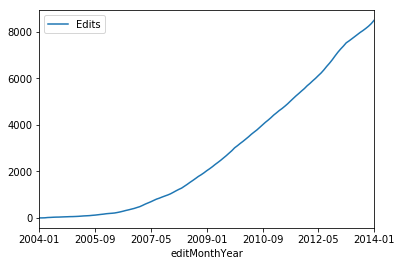

In [39]:
ActiveUsersCumSum.plot()

In [40]:
grouped = df.groupby(['editMonthYear', 'articleid'])

cohorts_articles = grouped.agg({'articleid': pd.Series.nunique})

# make the column names more meaningful
cohorts_articles.rename(columns={'articleid': 'ArticleEdits'}, inplace=True)
cohorts_articles.head()

ArticleEdits
editMonthYear articleid              
2004-01       21                    1
              65                    1
2004-02       599                   1
2004-03       4                     1
              600                   1

In [41]:
ActiveArticles = cohorts_articles.groupby('editMonthYear').count()
ActiveArticlesCumSum = ActiveArticles.cumsum()

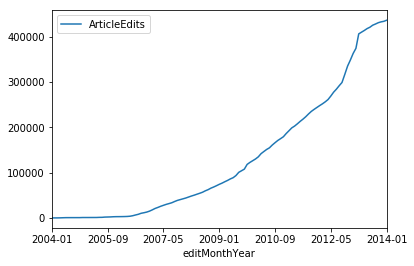

In [42]:
ActiveArticlesCumSum.plot()

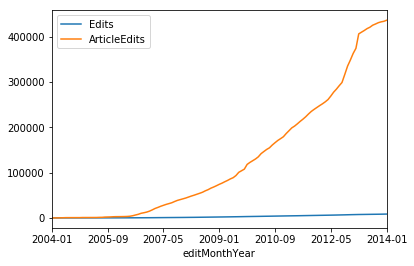

In [43]:
ax = ActiveUsersCumSum.plot()
ActiveArticlesCumSum.plot(ax=ax)

## 6) Graph representing the active users and active articles in Urdu Wikipedia

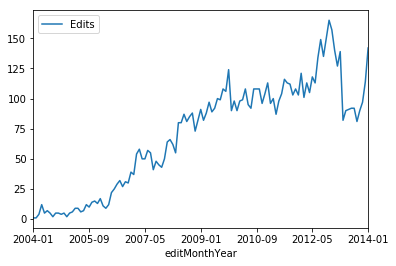

In [44]:
ActiveUsers.plot()

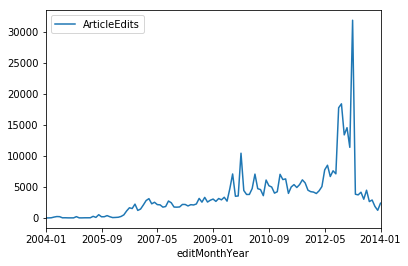

In [45]:
ActiveArticles.plot()

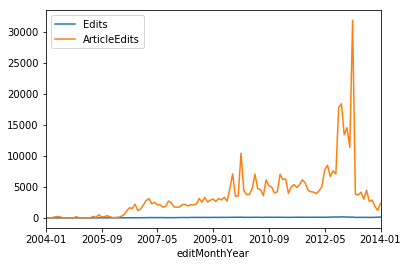

In [46]:
ax = ActiveUsers.plot()
ActiveArticles.plot(ax=ax)

## 7) A graph representing average number of posts per users over all users

In [47]:
AvgEdits = cohorts_active.groupby('editMonthYear').mean()

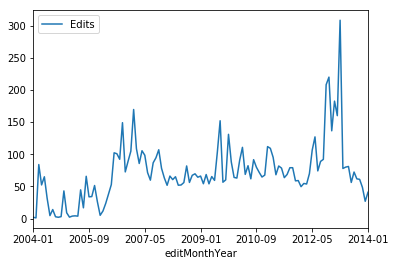

In [48]:
AvgEdits.plot()

## 8) A graph representing average number of posts per users broken by user cohorts

In [49]:
grouped = df.groupby(['CohortGroup', 'editMonthYear', 'editor_id'])

# count the unique users, orders, and total revenue per Group + Period
cohorts_active_switch = grouped.agg({'articleid': 'count'})

# make the column names more meaningful
cohorts_active_switch.rename(columns={'articleid': 'EditsPerMonth'}, inplace=True)
cohorts_active_switch.head()

EditsPerMonth
CohortGroup editMonthYear editor_id               
2004        2004-01       0.0                    2
            2004-02       0.0                    1
            2004-03       4.0                  296
                          6.0                    4
                          10.0                  34

* I then exported this to an excel document using cohorts_active_switch.to_csv('AvgPostsCohorts.csv') and created the graph in there (which is in the zip file)

## 8) Analysis of your results: 
*Your report should include an analysis of your results in terms of what you learned about the evolution of Wikipedia Urdu language and how your results compare to the original study
*In what aspects your results confirm the original study and in what aspect they differ
*Provide discussion on how you interpret similarities and differences.

* While this dataset is large, the number of unique editors is small, especially after dropping the null values. In the original study, they had millions of submissions. 
* The graph representing cumulative growth of active users shows that this number in increasing exponentially. In the original study, this number grew logorithmically. The graph representing cumulative growth of active articles shows that this number is also increasing exponentially while the original study grows logorithmically. Even though it is hard to see when they are plotted together, the cumulative growth of active users has the same shape as active articles, just on a different scale. In the original study, they were the same shape as well.
* The graph representing the active users shows that it is growing rather steadily, then drops sometime in 2013. In the original study, this grew logorithmically. The graph representing the active articles shows that it remains pretty steady then spikes towards the end of 2012 into 2013, then drops back down dramatically. In the orignal study, this also only grew logorithmically. Both of the drops happened at around the same time for the active users and active articles.
* The graph representing the average number of posts by user shows that it starts off low, then grows slightly and stays. Then it spikes and drops at the same time as it did in the active users/articles graph.
* The final graph representing average edits by cohort is very different from the original study. It seems that people who started earlier tended to edit towards the middle of the timeframe and then drop off towards the end. The users who started later edited a lot after about a year, but only did so much for a short amount of time before dropping off to a smaller amount of edits again.
* I think there are these differences because of the different type of platform. Wikipedia is more the edit information, whereas reddit is to share and respond to peoples posts. It seems that in the Wikipedia, once users got comfortable, they started to post a ton, but then completely dropped off. Whereas in the original study, the older the user, the more they posted and continued to post.